#議題一

##下載YOLOv9和一些前置需求##

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
drive.mount('/content/drive')

Mounted at /content/gdrive
Mounted at /content/drive


In [ ]:
!pwd
!mkdir issue1
%cd /content/drive/MyDrive/ml_hw3
!ls
!unzip -uq -O big5 貨櫃資料集.zip -d "/content/issue1"
!unzip -uq -O big5 圖片準確率測試集.zip -d "/content/issue1"

/content
/content/drive/MyDrive/ml_hw3
issue1	weights  圖片準確率測試集.zip  影片資料集.zip  貨櫃資料集.zip


In [ ]:
%cd /content/issue1
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

/content/issue1
Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (218/218), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 325 (delta 159), reused 156 (delta 156), pack-reused 107
Receiving objects: 100% (325/325), 2.23 MiB | 26.30 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/content/issue1/yolov9
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 65.1 MB/s eta 0:00:00


In [ ]:
%cd /content/issue1/yolov9
!mkdir weights
!cd weights

/content/issue1/yolov9


In [ ]:
%cd /content/issue1/yolov9/weights
!wget -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt

/content/issue1/yolov9/weights


##Yolov9運作檢查

In [ ]:
!wget -P /content/issue1/yolov9/data -q https://media.roboflow.com/notebooks/examples/dog.jpeg

In [ ]:
%cd /content/issue1/yolov9
!python detect.py --weights /content/issue1/yolov9/weights/yolov9-c.pt --conf 0.1 --source /content/issue1/yolov9/data/dog.jpeg --device 0

/content/issue1/yolov9
detect: weights=['/content/issue1/yolov9/weights/yolov9-c.pt'], source=/content/issue1/yolov9/data/dog.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 724 layers, 51141120 parameters, 0 gradients, 238.7 GFLOPs
image 1/1 /content/issue1/yolov9/data/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 338.4ms
Speed: 0.6ms pre-process, 338.4ms inference, 1468.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


<ipython-input-14-eaca559b5177>:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('dog.jpeg')


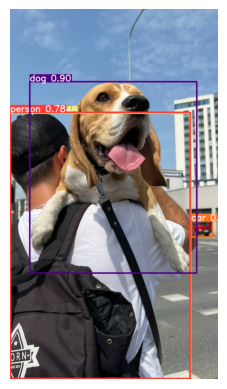

In [ ]:
import os
os.chdir("/content/issue1/yolov9/runs/detect/exp");
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imageio

im = imageio.imread('dog.jpeg')
# fig=plt.figure(figsize=(3,3))
plt.axis('off')
plt.imshow(im)
plt.show()

##轉換XML為TXT##

In [ ]:
%cd /content/issue1
!git clone https://github.com/isabek/XmlToTxt

/content/issue1
Cloning into 'XmlToTxt'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 105 (delta 21), reused 19 (delta 17), pack-reused 76
Receiving objects: 100% (105/105), 16.68 KiB | 5.56 MiB/s, done.
Resolving deltas: 100% (50/50), done.


In [ ]:
%cd /content/issue1/XmlToTxt
!pip install -r requirements.txt

/content/issue1/XmlToTxt


In [ ]:
%cd /content/issue1
!mkdir container_dataset
%cd container_dataset
!mkdir train
!mkdir test
!mkdir val

%cd /content/issue1/container_dataset/train
!mkdir images
!mv /content/issue1/貨櫃資料集/訓練集/*.jpg /content/issue1/container_dataset/train/images
%cd /content/issue1/container_dataset/test
!mkdir images
!mv /content/issue1/貨櫃資料集/測試集/*.jpg /content/issue1/container_dataset/test/images
%cd /content/issue1/container_dataset/val
!mkdir images
!mv /content/issue1/貨櫃資料集/驗證集/*.jpg /content/issue1/container_dataset/val/images

%cd /content/issue1/container_dataset/train
!mkdir labels
%cd /content/issue1/container_dataset/test
!mkdir labels
%cd /content/issue1/container_dataset/val
!mkdir labels

/content/issue1
/content/issue1/container_dataset
/content/issue1/container_dataset/train
/content/issue1/container_dataset/test
/content/issue1/container_dataset/val
/content/issue1/container_dataset/train
/content/issue1/container_dataset/test
/content/issue1/container_dataset/val


In [ ]:
%cd /content/issue1/XmlToTxt
!python xmltotxt.py -xml /content/issue1/貨櫃資料集/訓練集_xml -out /content/issue1/container_dataset/train/labels
!python xmltotxt.py -xml /content/issue1/貨櫃資料集/測試集_xml -out /content/issue1/container_dataset/test/labels
!python xmltotxt.py -xml /content/issue1/貨櫃資料集/驗證集_xml -out /content/issue1/container_dataset/val/labels

/content/issue1/XmlToTxt


## 建立YAML##

In [ ]:
import yaml

dataset_path = '/content/issue1/container_dataset'

train_images = f'{dataset_path}/train/'
val_images = f'{dataset_path}/val/'
test_images = f'{dataset_path}/test/'

classes = ['container']

config = {
    'train': train_images,
    'val': val_images,
    'test': test_images,
    'nc': len(classes),
    'names': {i: name for i, name in enumerate(classes)}
}

yaml_file_path = '/content/issue1/container_dataset'

with open(f'{yaml_file_path}/data.yaml', 'w') as file:
    yaml.dump(config, file)

##訓練模型

In [ ]:
%cd /content/issue1/yolov9

!python train_dual.py --batch 8 --epochs 50 --data /content/issue1/container_dataset/data.yaml --weights /content/issue1/yolov9/weights/yolov9-c.pt --cfg /content/issue1/yolov9/models/detect/yolov9-c.yaml --hyp /content/issue1/yolov9/data/hyps/hyp.scratch-high.yaml --name yolov9_custom

/content/issue1/yolov9
2024-05-23 18:06:46.342980: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-23 18:06:46.343034: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-23 18:06:46.447551: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-23 18:06:46.653870: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-23 18:06:48.69

In [ ]:
!cp -r /content/issue1/yolov9/runs/train/yolov9_custom /content/drive/MyDrive/ml_hw3/weights

## 偵測測試集

In [ ]:
%cd /content/issue1/yolov9
!python detect.py --weights /content/issue1/yolov9/runs/train/yolov9_custom/weights/best.pt --source /content/issue1/container_dataset/test/images

/content/issue1/yolov9
detect: weights=['/content/issue1/yolov9/runs/train/yolov9_custom/weights/best.pt'], source=/content/issue1/container_dataset/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
yolov9-c summary: 724 layers, 50958630 parameters, 0 gradients, 237.6 GFLOPs
image 1/755 /content/issue1/container_dataset/test/images/image_0001.jpg: 384x640 1 container, 259.1ms
image 2/755 /content/issue1/container_dataset/test/images/image_0002.jpg: 384x640 1 container, 60.6ms
image 3/755 /content/issue1/container_dataset/test/images/image_

In [ ]:
!python val_dual.py --weights runs/train/yolov9_custom/weights/best.pt --data /content/issue1/container_dataset/data.yaml --task test

val_dual: data=/content/issue1/container_dataset/data.yaml, weights=['runs/train/yolov9_custom/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
yolov9-c summary: 724 layers, 50958630 parameters, 0 gradients, 237.6 GFLOPs
test: Scanning /content/issue1/container_dataset/test/labels.cache... 755 images, 0 backgrounds, 0 corrupt: 100% 755/755 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 24/24 [00:39<00:00,  1.65s/it]
                   all        755        755          1          1      0.995      0.891
Speed: 0.1ms pre-process, 36.6ms inference, 4.1ms NMS per im

## 計算F1績效

In [ ]:
def f1_score(precision, recall):
    if precision + recall == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)

In [ ]:
print(f1_score(1, 1))

1.0


## 分割貨櫃號碼區域

In [ ]:
%cd /content/issue1
!mkdir img_acc_test
!mv /content/issue1/圖片準確率測試集/*.jpg /content/issue1/img_acc_test

/content/issue1


In [ ]:
%cd /content/issue1/yolov9
!python detect.py --weights runs/train/yolov9_custom/weights/best.pt --source /content/issue1/img_acc_test --save-txt --name img_acc_test

/content/issue1/yolov9
detect: weights=['runs/train/yolov9_custom/weights/best.pt'], source=/content/issue1/img_acc_test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=img_acc_test, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
yolov9-c summary: 724 layers, 50958630 parameters, 0 gradients, 237.6 GFLOPs
image 1/35 /content/issue1/img_acc_test/FFAU2895947.jpg: 384x640 1 container, 260.9ms
image 2/35 /content/issue1/img_acc_test/MAGU5605323 .jpg: 384x640 1 container, 59.0ms
image 3/35 /content/issue1/img_acc_test/SEKU5875349.jpg: 384x640 1 container, 61.1ms
image 4/35 /content/issue1/img_acc_test/SEKU

In [ ]:
import cv2
import os

def parse_yolo_txt(txt_file):
    with open(txt_file, 'r') as f:
        lines = f.readlines()

    bbox_info = []
    for line in lines:
        parts = line.strip().split()
        if len(parts) == 5:
            class_id = int(parts[0])
            center_x = float(parts[1])
            center_y = float(parts[2])
            width = float(parts[3])
            height = float(parts[4])
            bbox_info.append((class_id, center_x, center_y, width, height))

    return bbox_info

def yolo_to_bbox(bbox, img_width, img_height):
    class_id, center_x, center_y, width, height = bbox
    x1 = int((center_x - width / 2) * img_width)
    y1 = int((center_y - height / 2) * img_height)
    x2 = int((center_x + width / 2) * img_width)
    y2 = int((center_y + height / 2) * img_height)

    return (x1, y1, x2, y2)

def crop_image(image_path, bbox, output_path):
    img = cv2.imread(image_path)
    img_height, img_width = img.shape[:2]

    x1, y1, x2, y2 = yolo_to_bbox(bbox, img_width, img_height)

    cropped_img = img[y1:y2, x1:x2]

    cv2.imwrite(output_path, cropped_img)

In [ ]:
%cd /content/issue1/img_acc_test
!mkdir croped_img

/content/issue1/img_acc_test


In [ ]:
for file in os.listdir('/content/issue1/yolov9/runs/detect/img_acc_test'):
  if file.endswith('.jpg'):
    name = file.replace('.jpg', '')
    print(name)

    bbox_info = parse_yolo_txt(f'/content/issue1/yolov9/runs/detect/img_acc_test/labels/{name}.txt')

    for i, bbox in enumerate(bbox_info):
      output_path = f'/content/issue1/img_acc_test/croped_img/{name}.jpg'
      crop_image(file, bbox, output_path)
      print(f'Saved cropped image to {output_path}')

SEKU6026686
Saved cropped image to /content/issue1/img_acc_test/croped_img/SEKU6026686.jpg
WHSU6856285
Saved cropped image to /content/issue1/img_acc_test/croped_img/WHSU6856285.jpg
WHSU5998393
Saved cropped image to /content/issue1/img_acc_test/croped_img/WHSU5998393.jpg
WHSU5610492
Saved cropped image to /content/issue1/img_acc_test/croped_img/WHSU5610492.jpg
WHSU6167120
Saved cropped image to /content/issue1/img_acc_test/croped_img/WHSU6167120.jpg
SEKU5877491
Saved cropped image to /content/issue1/img_acc_test/croped_img/SEKU5877491.jpg
WHSU2483178
Saved cropped image to /content/issue1/img_acc_test/croped_img/WHSU2483178.jpg
WHSU2615314
Saved cropped image to /content/issue1/img_acc_test/croped_img/WHSU2615314.jpg
TSSU5061615
Saved cropped image to /content/issue1/img_acc_test/croped_img/TSSU5061615.jpg
FFAU2895947
Saved cropped image to /content/issue1/img_acc_test/croped_img/FFAU2895947.jpg
WHSU6040178
Saved cropped image to /content/issue1/img_acc_test/croped_img/WHSU6040178.jpg

## 辨識貨櫃號碼

In [ ]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 36.2 MB/s eta 0:00:00


In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imageio
import easyocr
from PIL import Image, ImageEnhance
import cv2
import numpy as np

In [ ]:
# Create a reader to do OCR.
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
def adjust_brightness_if_needed(image_path, brightness_threshold=100, brightness_factor=2.3):
    image = Image.open(image_path)

    gray_image = image.convert('L')

    mean_brightness = gray_image.histogram()
    mean_brightness = sum(i * w for i, w in enumerate(mean_brightness)) / sum(mean_brightness)
    # print(f"平均明度: {mean_brightness}")

    if mean_brightness < brightness_threshold:
        # print("明度低，調整")
        enhancer = ImageEnhance.Brightness(image)
        adjusted_image = enhancer.enhance(brightness_factor)
    else:
        # print("明度正常")
        adjusted_image = image

    return adjusted_image

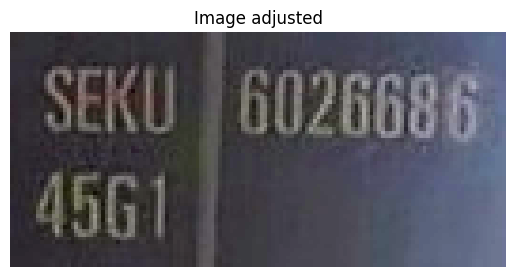

SEKU60266864561


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


In [ ]:
image_path = '/content/issue1/img_acc_test/croped_img/SEKU6026686.jpg'

adjusted_image = adjust_brightness_if_needed(image_path)

reader = easyocr.Reader(['en'])
adjusted_image_cv = cv2.cvtColor(np.array(adjusted_image), cv2.COLOR_RGB2BGR)

plt.imshow(cv2.cvtColor(adjusted_image_cv, cv2.COLOR_BGR2RGB))
plt.title('Image adjusted')
plt.axis('off')
plt.show()

results = reader.readtext(adjusted_image_cv, allowlist="ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789", decoder = 'beamsearch', beamWidth=50, contrast_ths=0.5, detail = 0, mag_ratio=3)

total_result = ""
for result in results:
  total_result += result
print(total_result)

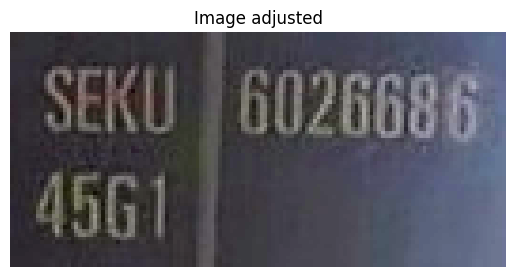

SEKU60266864561


WHSU685628I64561


WHSU59903934561


WHSU561049124561


WHSU6167124561


SEKU58774904561


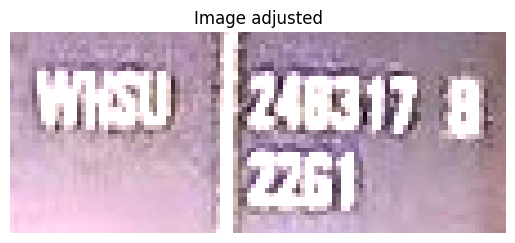

G7455179261


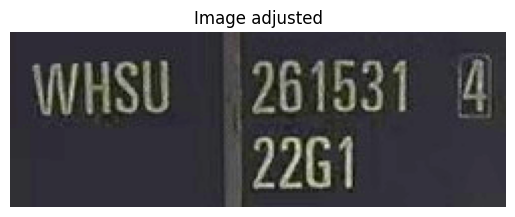

WHSU2615312261


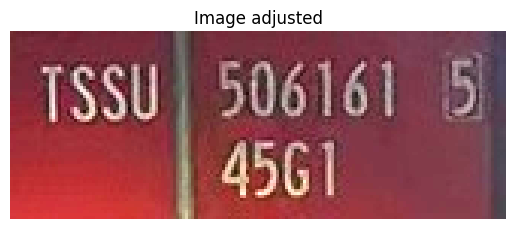

TSSU50616154561


FFAU209594774561


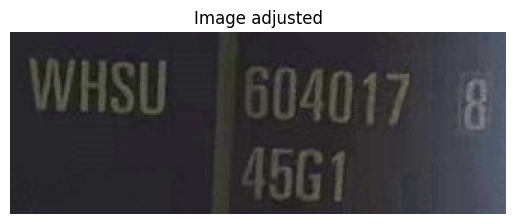

WHSU60401784561


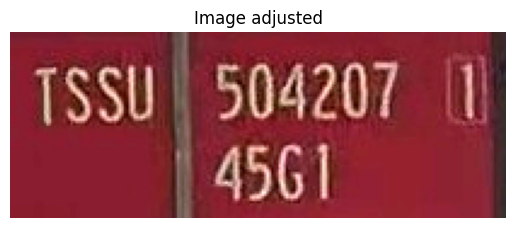

TSSU5042074561


OHSU66516664561


TSSU501734T4561


WHSU6557384561


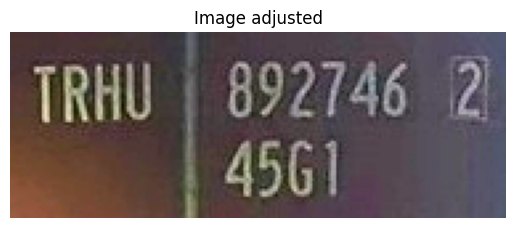

TRHU89274624561


SEKU58753494561


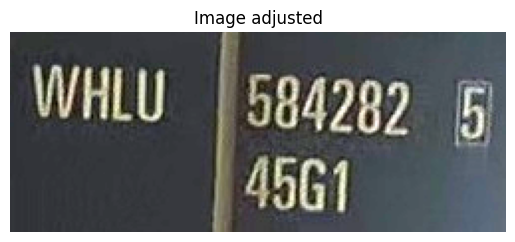

WHLU58428254561


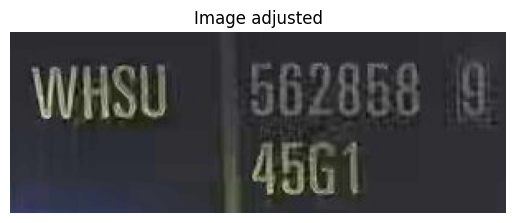

WHSU5620581Q4561


WHSU556329184561


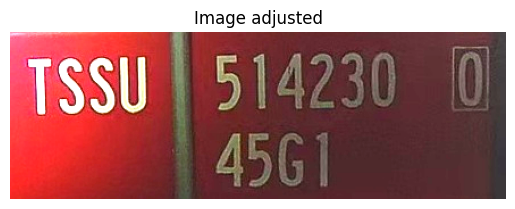

TSSU51423004561


WHSU574446154561


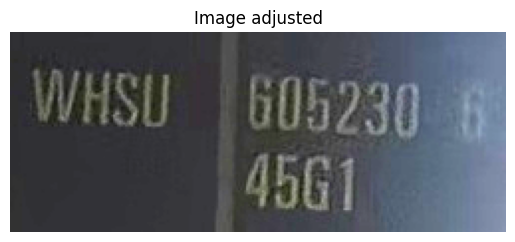

WHSU6052304645G1


WHSU59911045G1


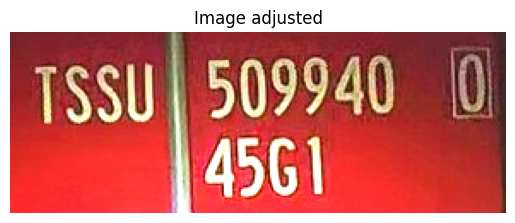

TSSU509940004561


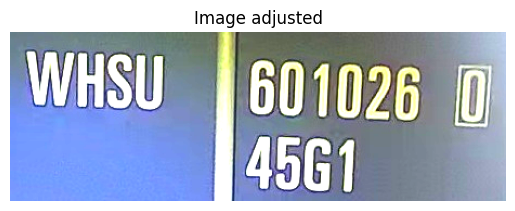

WHSU601026I4561


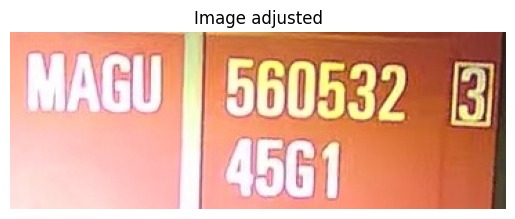

MACU560532134561


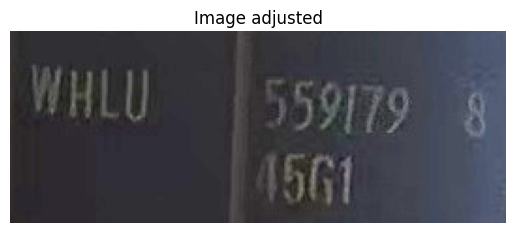

WHLU55917984561


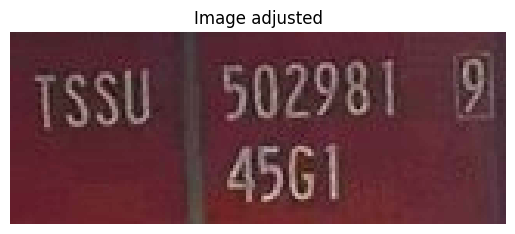

TSSU502981914561


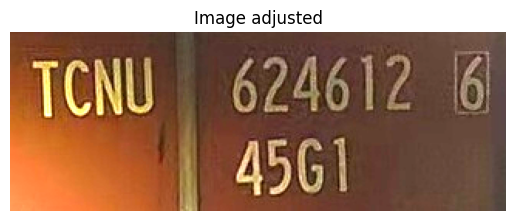

TCNU6246121614561


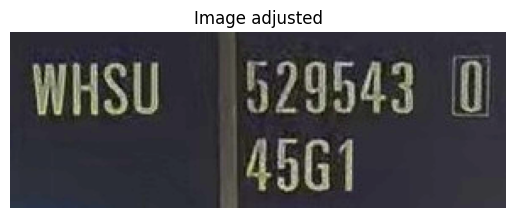

WHSU52954304561


WHSU2864761512261


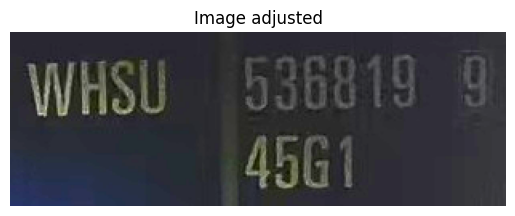

WHSU536819I945G1


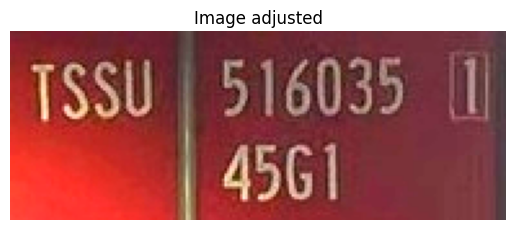

TSSU5160354561


TLLU40807364561


In [ ]:
img_path = '/content/issue1/img_acc_test/croped_img/'
reader = easyocr.Reader(['en'])

prediction_nums = []

for img in os.listdir(img_path):
    img_file = os.path.join(img_path, img)
    adjusted_image = adjust_brightness_if_needed(img_file)
    adjusted_image_cv = cv2.cvtColor(np.array(adjusted_image), cv2.COLOR_RGB2BGR)
    plt.imshow(cv2.cvtColor(adjusted_image_cv, cv2.COLOR_BGR2RGB))
    plt.title('Image adjusted')
    plt.axis('off')
    plt.show()

    results = reader.readtext(adjusted_image_cv, allowlist="ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789", decoder='beamsearch', beamWidth=150, adjust_contrast=0.7, detail=0, mag_ratio=4)

    total_result = ""
    for result in results:
        total_result += result
    print(total_result)
    prediction_nums.append(total_result)

## 計算貨櫃號碼

In [ ]:
def letter_to_number(letter):
    letter = letter.upper()
    letter_map = {'A': 10}
    offset = 0
    for i, char in enumerate(range(ord('B'), ord('Z')+1), start=12):
        i += offset
        if i % 11 == 0:
            offset += 1
            i += 1
        letter_map[chr(char)] = i
    return letter_map.get(letter, letter)

In [ ]:
# socre = success / (len(files))

def check_number(container_number):
  sum = 0
  for i in range(0, 10):
    current_num = container_number[i]
    if current_num.isalpha():
      current_num = letter_to_number(current_num)
    sum += int(current_num) * pow(2, i)
  # print("sum:", sum)

  elev_num = sum % 11
  if elev_num == 10:
    return 0
  else:
    return elev_num

## 貨櫃號碼績效檢測

In [ ]:
container_num_acc = 0
correct = 0

for prediction in prediction_nums:
  if prediction[10].isdigit():
    if int(check_number(prediction)) == int(prediction[10]):
      correct += 1
      print(prediction[:11])

container_num_acc = correct / len(prediction_nums)
print(container_num_acc, correct, len(prediction_nums))

SEKU6026686
TSSU5061615
WHSU6040178
TRHU8927462
SEKU5875349
WHLU5842825
TSSU5142300
WHSU5991104
TSSU5099400
WHLU5591798
TSSU5029819
WHSU5295430
TLLU4080736
0.37142857142857144 13 35


#議題二

In [ ]:
%cd /content
!mkdir issue2
%cd /content/drive/MyDrive/ml_hw3
!ls
!unzip -uq -O big5 影片資料集.zip -d "/content/issue2"
!mv /content/issue2/影片資料集 /content/issue2/video_dataset

/content
/content/drive/MyDrive/ml_hw3
issue1	weights  圖片準確率測試集.zip  影片資料集.zip  貨櫃資料集.zip


##影片偵測

In [ ]:
%cd /content/issue1/yolov9
!python detect.py --weights /content/issue1/yolov9/runs/train/yolov9_custom/weights/best.pt --conf 0.25 --source /content/issue2/video_dataset --save-txt

/content/issue1/yolov9
detect: weights=['/content/issue1/yolov9/runs/train/yolov9_custom/weights/best.pt'], source=/content/issue2/video_dataset, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
yolov9-c summary: 724 layers, 50958630 parameters, 0 gradients, 237.6 GFLOPs
video 1/10 (1/105) /content/issue2/video_dataset/video_0001.avi: 384x640 1 container, 169.9ms
video 1/10 (2/105) /content/issue2/video_dataset/video_0001.avi: 384x640 1 container, 55.7ms
video 1/10 (3/105) /content/issue2/video_dataset/video_0001.avi: 384x640 1 container, 55.7ms
video 

##逐幀處理區域切割

In [ ]:
def crop_frame(img, bbox, output_path):
    img_height, img_width = img.shape[:2]
    x1, y1, x2, y2 = yolo_to_bbox(bbox, img_width, img_height)
    cropped_img = img[y1:y2, x1:x2]
    cv2.imwrite(output_path, cropped_img)

In [ ]:
%cd /content/issue2
!mkdir crop_avi_img

/content/issue2


In [ ]:
import cv2
import os

video_dir = '/content/issue1/yolov9/runs/detect/exp5'
txt_dir = '/content/issue1/yolov9/runs/detect/exp5/labels'

for video_name in os.listdir(video_dir):
    if video_name.endswith('.mp4'):
        video_path = os.path.join(video_dir, video_name)

        # 開啟影片
        cap = cv2.VideoCapture(video_path)

        frame_idx = 1
        while True:
            ret, frame = cap.read()
            if not ret:
                break

            # 構造對應這一幀的txt檔案名稱
            base_name = os.path.splitext(video_name)[0]
            txt_name = f'{base_name}_{frame_idx}.txt'
            txt_path = os.path.join(txt_dir, txt_name)

            # 如果txt檔案存在,讀取並裁切
            if os.path.exists(txt_path):
                bboxes = parse_yolo_txt(txt_path)
                for bbox in bboxes:
                    x1, y1, x2, y2 = yolo_to_bbox(bbox, frame.shape[1], frame.shape[0])
                    output_path = f'/content/issue2/crop_avi_img/{txt_name}.jpg'
                    crop_frame(frame, bbox, output_path)

            frame_idx += 1

        # 釋放影片資源
        cap.release()

##逐幀判斷貨櫃號碼

In [ ]:
img_path = '/content/issue2/crop_avi_img/'
reader = easyocr.Reader(['en'])

videos = []
for i in range(1, 11):
  frames = []
  current_title = "video_00"+"{:0>2d}".format(i)
  print(current_title)
  for img in os.listdir(img_path):
    if img.startswith(current_title):
      img_file = os.path.join(img_path, img)
      adjusted_image = adjust_brightness_if_needed(img_file)
      adjusted_image_cv = cv2.cvtColor(np.array(adjusted_image), cv2.COLOR_RGB2BGR)
      # plt.imshow(cv2.cvtColor(adjusted_image_cv, cv2.COLOR_BGR2RGB))
      # plt.title('Image adjusted')
      # plt.axis('off')
      # plt.show()

      results = reader.readtext(adjusted_image_cv, allowlist="ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789", decoder='beamsearch', beamWidth=150, adjust_contrast=0.7, detail=0, mag_ratio=4)

      total_result = ""
      for result in results:
          total_result += result
      # print(len(total_result), total_result)
      if len(total_result) > 10 and total_result[10].isdigit() and int(check_number(total_result)) == int(total_result[10]):
        print(total_result)
        frames.append(total_result)
  videos.append(frames)

video_0001
SEKU587534945G1
SEKU58753494561
SEKU58753494561
SEKU587534945G1
SEKU58753494561
SEKU587534945G1
SEKU58753494561
SEKU58753494561
SEKU587534945G1
SEKU587534945G1
SEKU58753494561
SEKU587534945G1
SEKU58753494561
SEKU587534974561
SEKU58753494561
SEKU587534945G1
SEKU58753494561
SEKU587534945G1
SEKU58753494561
SEKU587534945G1
SEKU587534945G1
SEKU587534945G1
SEKU58753494561
SEKU58753494561
SEKU587534945G1
SEKU58753494561
SEKU587534945G1
SEKU5875349145G1
SEKU587534945G1
SEKU587534945G1
SEKU587534945G1
SEKU587534945G1
SEKU587534945G1
SEKU587534945G1
SEKU58753494561
SEKU58753494561
SEKU58753494561
SEKU587534945G1
SEKU587534945G1
SEKU58753494561
SEKU587534945G1
SEKU587534945G1
video_0002
TSSU50994004561
TSSU50994004561
TSSU50994004561
TSSU50994004561
TSSU50994004561
TSSU50994004561
TSSU50994004561
TSSU50994004561
TSSU50994004561
TSSU50994004561
TSSU50994004561
TSSU50994004561
TSSU5099400O4561
TSSU50994004561
TSSU50994004561
TSSU50994004561
TSSU50994004561
TSSU50994004561
TSSU50994004561

##選出各影片最後輸出

In [ ]:
num_list = []
for video in videos:
  list_set = set(video)
  choice = max(video, key=video.count)
  num_list.append(choice)
  print(choice[:11], video.count(choice))

SEKU5875349 23
TSSU5099400 145
HSU50270545 1
WHSU6728690 43
WHSU5368199 26
WNSU2403128 1
WHSU6167120 8
WHSU6892256 42
WHISU522379 2
TLLU4080736 125


In [ ]:
container_num_acc = 0
correct = 0

for num in num_list:
  if num[10].isdigit():
    if int(check_number(num)) == int(num[10]):
      correct += 1
      print(num[:11])

container_num_acc = correct / len(num_list)
print(container_num_acc, correct, len(num_list))

SEKU5875349
TSSU5099400
HSU50270545
WHSU6728690
WHSU5368199
WNSU2403128
WHSU6167120
WHSU6892256
WHISU522379
TLLU4080736
1.0 10 10


## 檢視圖片

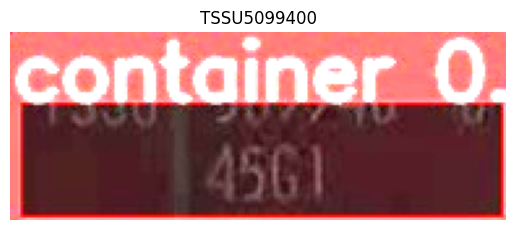

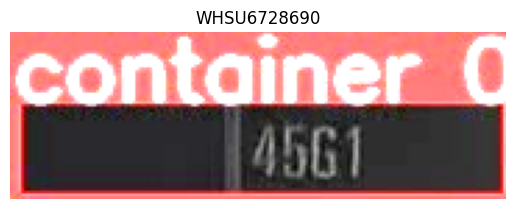

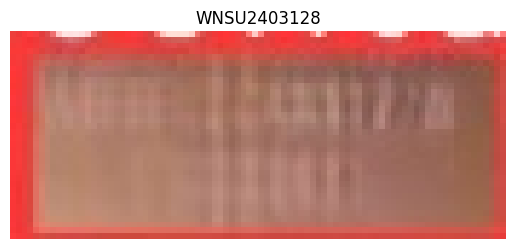

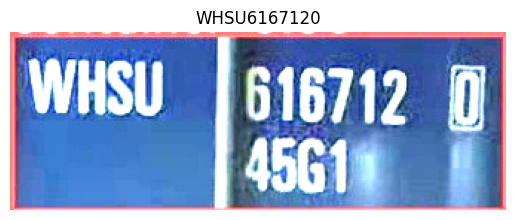

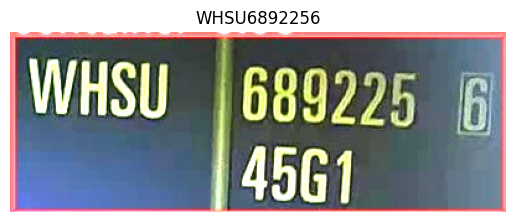

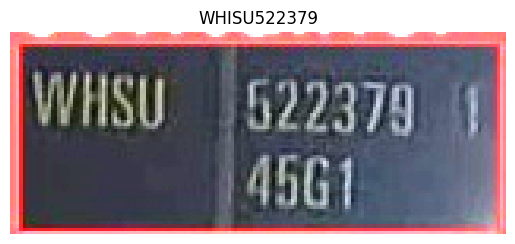

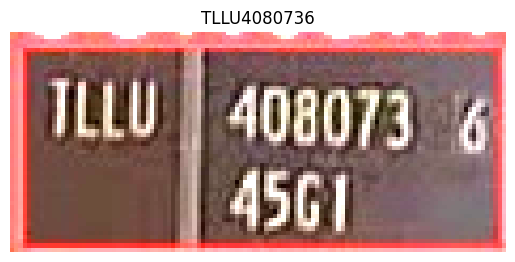

In [ ]:
img_path = '/content/issue2/crop_avi_img/'

for i in range(1, 11):
  current_title = "video_00"+"{:0>2d}_50".format(i)
  for img in os.listdir(img_path):
    if img.startswith(current_title):
      img_file = os.path.join(img_path, img)
      adjusted_image = adjust_brightness_if_needed(img_file)
      adjusted_image_cv = cv2.cvtColor(np.array(adjusted_image), cv2.COLOR_RGB2BGR)
      plt.imshow(cv2.cvtColor(adjusted_image_cv, cv2.COLOR_BGR2RGB))
      plt.title(f'{num_list[i-1][:11]}')
      plt.axis('off')
      plt.show()
      break

In [ ]:
%cd /content
!zip -r -uq /content/yolov9_issue2.zip /content/issue2
from google.colab import files
files.download('yolov9_issue2.zip')

/content


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>